# **_Time Series Prediction_**
### __*Testing Different Methods of Time Series Prediction*__

<br>

### __*Import Libraries*__
### __*[DataTable](https://datatable.readthedocs.io/en/latest/start/quick-start.html)*__

In [1]:
# Datasets
import datatable as dt
import matplotlib.pyplot as plt

# Torch libraries
import torch
from torch import nn, optim

# Device config
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')
if torch.has_mps:
    device = torch.device('mps')
print('Using the Processor') if device == torch.device('cpu') else print('Using the Graphics Card')

Using the Graphics Card


<br>

### __*Prepare & Show Weather Data*__

In [2]:
# Show structure of dataset
weather_raw = dt.fread('data/seattle-weather.csv').to_pandas()
weather_raw.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


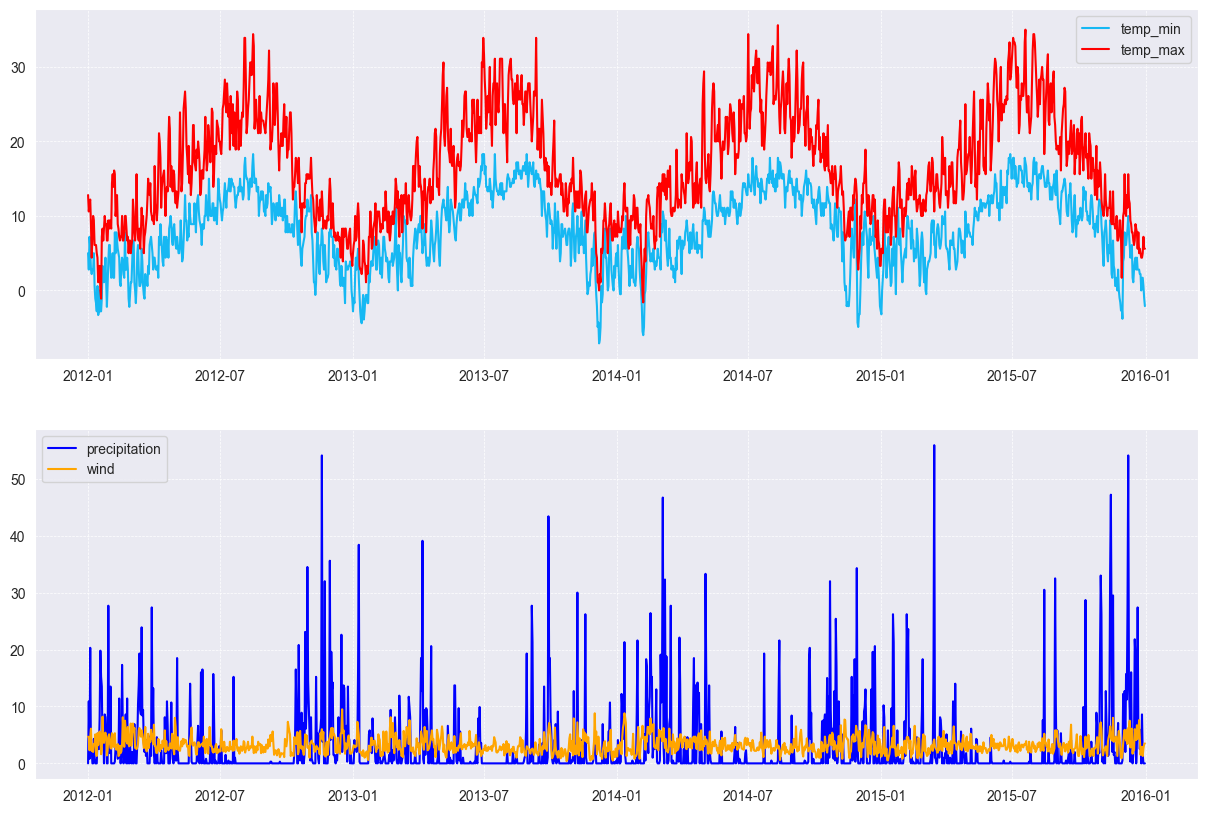

In [3]:
# Create a plot
fig_weather, axs_weather = plt.subplots(nrows=2, ncols=1, figsize=[15,10])

min_plot, = axs_weather[0].plot(weather_raw['date'], weather_raw['temp_min'],
                                label='temp_min', color='#16b8f3')
max_plot, = axs_weather[0].plot(weather_raw['date'], weather_raw['temp_max'],
                                label='temp_max', color='red')

precipitation, = axs_weather[1].plot(weather_raw['date'], weather_raw['precipitation'],
                                     label='precipitation', color='blue')
wind_plot, = axs_weather[1].plot(weather_raw['date'], weather_raw['wind'],
                                 label='wind', color='orange')

axs_weather[0].grid(linestyle='--', linewidth=0.5)
axs_weather[0].legend(handles=[min_plot, max_plot])
axs_weather[1].grid(linestyle='--', linewidth=0.5)
axs_weather[1].legend(handles=[precipitation, wind_plot])
pass

<br>

### __*Prepare & Show Google Stock Data*__

In [4]:
# Show structure of dataset
goog_raw = dt.fread('data/GOOG.csv').to_pandas()
goog_raw.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


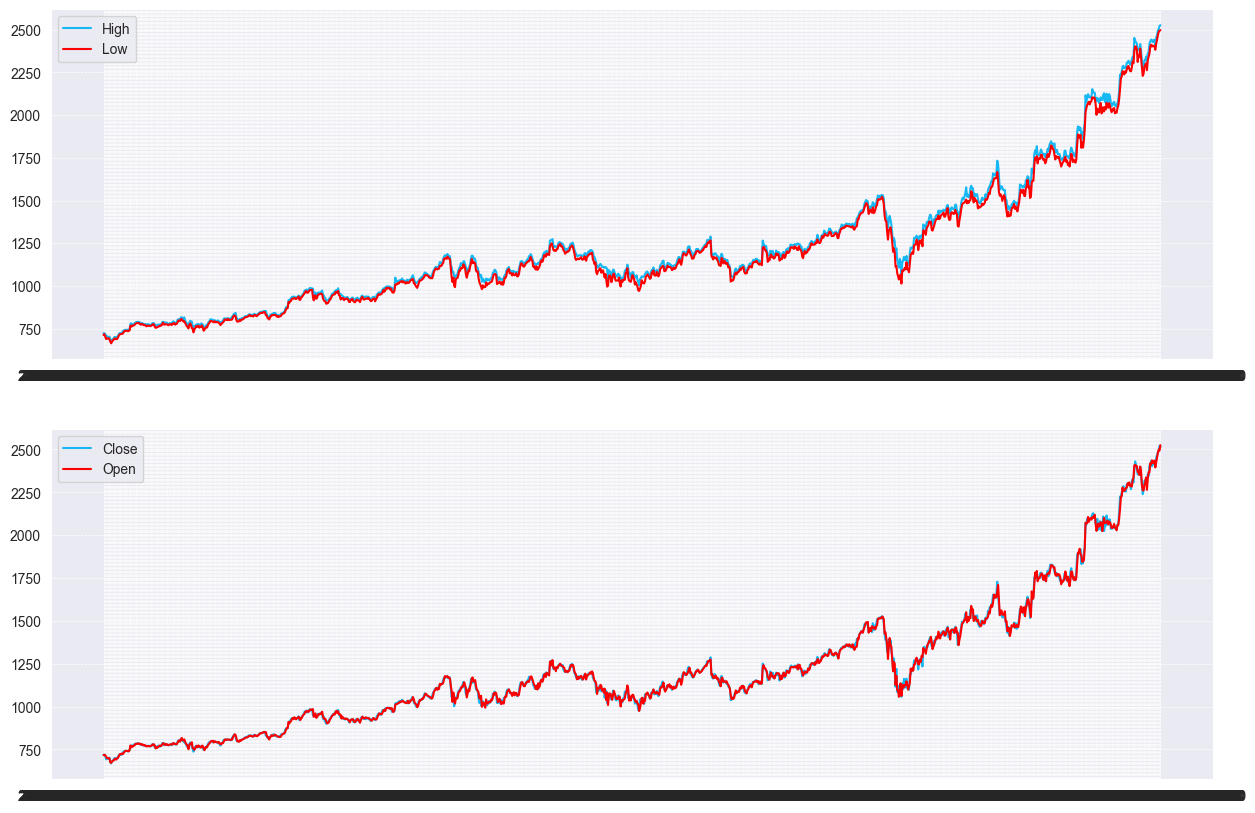

In [6]:
# Create a plot
fig_goog, axs_goog = plt.subplots(nrows=2, ncols=1, figsize=[15,10])

close_plot, = axs_goog[1].plot(goog_raw['date'], goog_raw['close'],
                               label='Close', color='#16b8f3')
high_plot, = axs_goog[0].plot(goog_raw['date'], goog_raw['high'],
                              label='High', color='#16b8f3')
low_plot, = axs_goog[0].plot(goog_raw['date'], goog_raw['low'],
                             label='Low', color='red')
open_plot, = axs_goog[1].plot(goog_raw['date'], goog_raw['open'],
                              label='Open', color='red')

axs_goog[0].grid(linestyle='--', linewidth=0.5)
axs_goog[0].legend(handles=[high_plot, low_plot])
axs_goog[1].grid(linestyle='--', linewidth=0.5)
axs_goog[1].legend(handles=[close_plot, open_plot])
pass

<br>

### __*aaa*__